# Final Project Step 5 Topic Models

```
Course:   DS 5001 
Module:   Final
Author:   Thomas McIntyre gem5cm@virginia.edu
Purpose:  This notebook will utlize the data created in step 2 to get topic models.
```

In [1]:
data_home = "data"
local_lib = "code"
OHCO = ['book_id', 'chap_num', 'para_num', 'sent_num', 'token_num']
SENTS = OHCO[:4]
PARAS = OHCO[:3]
CHAPS = OHCO[:2]
BOOKS = OHCO[:1]

In [2]:
import pandas as pd
import numpy as np
import plotly_express as px
from sklearn.decomposition import LatentDirichletAllocation as LDA
import sys; sys.path.append(local_lib)
from topicmodel import TopicModel
%matplotlib inline

In [3]:
LIB = pd.read_csv(f"{data_home}/LIB.csv").set_index(OHCO[:1])
CORPUS = pd.read_csv(f"{data_home}/CORPUS.csv").set_index(OHCO)
VOCAB = pd.read_csv(f"{data_home}/VOCAB.csv").set_index("term_str")
BOW = pd.read_csv(f"{data_home}/BOW.csv").rename(columns = {"Unnamed: 2": "term_str"}).set_index(["book_id", "chap_num", "term_str"])
TFIDF = pd.read_csv(f"{data_home}/TFIDF.csv").set_index(CHAPS)
DOC = pd.read_csv(f"{data_home}/DOC.csv").set_index(CHAPS)

In [4]:
DOC = DOC.join(LIB, on='book_id')
top2000 = VOCAB.loc[VOCAB["max_pos"].isin(["NN","NNS", "VB", "VBD", "VBG", "VBN", "VBP", "VBZ", "JJ", "JJR", "JJS", "RB", "RBR", "RBS"])].sort_values("dfidf", ascending = False).head(2000)
SIGS = top2000.index

In [5]:
max_iter = 10
X = BOW.n.unstack(fill_value=0)[SIGS]
tm = TopicModel(X)
tm.n_topics = 10
tm.n_terms = 2000

In [6]:
tm.X

term_str          easy  present  fool  big  loved  darkness  steps  shut  age  \
book_id chap_num                                                                
1       1          0.0      0.0   1.0  1.0    1.0       3.0    0.0   0.0  0.0   
        2          1.0      0.0   0.0  1.0    1.0       0.0    0.0   0.0  2.0   
        3          1.0      0.0   0.0  0.0    1.0       1.0    0.0   0.0  2.0   
        4          1.0      0.0   2.0  5.0    1.0       1.0    0.0   0.0  1.0   
        5          1.0      0.0   0.0  1.0    4.0       6.0    1.0   0.0  1.0   
...                ...      ...   ...  ...    ...       ...    ...   ...  ...   
26654   13         1.0      2.0   0.0  0.0    4.0       2.0    0.0   0.0  0.0   
        14         0.0      0.0   0.0  0.0    0.0       0.0    0.0   1.0  0.0   
        15         1.0      0.0   0.0  0.0    0.0       0.0    0.0   0.0  0.0   
        16         0.0      0.0   0.0  2.0    0.0       0.0    0.0   1.0  0.0   
        17         1.0      1.0   0.0  2.0    1.0       1.0    0.0   0.0  1.0   

term_str          living  ...  intended  roaring   men  light  gentlemen  \
book_id chap_num          ...                                              
1       1            2.0  ...       0.0      0.0   9.0    7.0        0.0   
        2            0.0  ...       0.0      0.0   5.0    0.0        0.0   
        3            2.0  ...       0.0      0.0   4.0    2.0        0.0   
        4            0.0  ...       0.0      1.0  13.0    4.0        0.0   
        5            2.0  ...       0.0      0.0   7.0    2.0        0.0   
...                  ...  ...       ...      ...   ...    ...        ...   
26654   13           1.0  ...       0.0      0.0   0.0    5.0        0.0   
        14           0.0  ...       0.0      0.0   1.0    2.0        1.0   
        15           1.0  ...       0.0      0.0   0.0    1.0        0.0   
        16           1.0  ...       0.0      0.0   0.0    0.0        0.0   
        17           0.0  ...       0.0      0.0   0.0    6.0        0.0   

term_str          footsteps  wretch  yielded  bench  mocking  
book_id chap_num                                              
1       1               0.0     0.0      0.0    0.0      1.0  
        2               0.0     0.0      0.0    0.0      0.0  
        3               0.0     0.0      0.0    0.0      0.0  
        4               0.0     0.0      0.0    0.0      0.0  
        5               2.0     0.0      0.0    0.0      0.0  
...                     ...     ...      ...    ...      ...  
26654   13              0.0     0.0      0.0    0.0      0.0  
        14              0.0     0.0      0.0    0.0      0.0  
        15              0.0     0.0      0.0    0.0      0.0  
        16              0.0     0.0      0.0    0.0      0.0  
        17              0.0     0.0      0.0    0.0      0.0  

[533 rows x 2000 columns]

In [7]:
tm.get_model()

In [8]:
tm.describe_topics()

In [9]:
tm.get_model_stats()

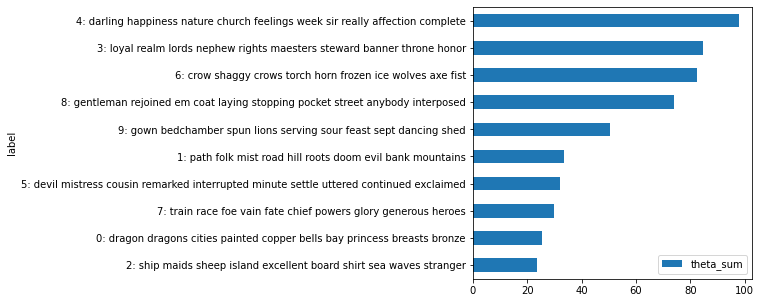

In [10]:
%matplotlib inline
tm.plot_topics()

In [11]:
tm.TOPIC.sort_values(by = "theta_sum", ascending = False).head()

,phi_sum,theta_sum,h,top_terms_rel,top_terms,label
topic_id,,,,,,
4,65898.574097,97.717663,10.00,darling happiness nature church feelings week ...,sir room yes quite house cried course children...,4: darling happiness nature church feelings we...
3,83015.138055,84.782980,9.91,loyal realm lords nephew rights maesters stewa...,king father men brother lady son boy red gods ...,3: loyal realm lords nephew rights maesters st...
6,74808.481766,82.472930,9.90,crow shaggy crows torch horn frozen ice wolves...,men wall horse sword cold water blood feet hed...,6: crow shaggy crows torch horn frozen ice wol...
8,44638.315175,73.849773,9.75,gentleman rejoined em coat laying stopping poc...,replied boy dear gentleman door got room looki...,8: gentleman rejoined em coat laying stopping ...
9,41714.446678,50.255888,9.63,gown bedchamber spun lions serving sour feast ...,lady father sister wine door girl gold boy hai...,9: gown bedchamber spun lions serving sour fea...


In [12]:
LIB

,book_title,book_file,chap_regex,book_length,n_chaps,genre,mood,author,label
book_id,,,,,,,,,
1,"A Game of Thrones, by RR Martin",corpus/MARTIN_A_GAME_OF_THRONES-pg1.txt,[A-Z]+[A-Z]+[A-Z]+,294315,78,fantasy,adventure,RR Martin,"A Game of Thrones, by RR Martin–F"
2,"A Clash of Kings, by RR Martin",corpus/MARTIN_A_CLASH_OF_KINGS-pg2.txt,[A-Z]+[A-Z]+[A-Z]+,324029,142,fantasy,adventure,RR Martin,"A Clash of Kings, by RR Martin–F"
3,"A Storm of Swords, by RR Martin",corpus/MARTIN_A_STORM_OF_SWORDS-pg3.txt,[A-Z]+[A-Z]+[A-Z]+,417469,95,fantasy,adventure,RR Martin,"A Storm of Swords, by RR Martin–F"
4,"The Fellowship of the Ring, by JRR Tolkien",corpus/TOLKIEN_THE_FELLOWSHIP_OF_THE_RING-pg4.txt,_Chapter,180888,22,fantasy,adventure,JRR Tolkien,"The Fellowship of the Ring, by JRR Tolkien–F"
16,"Peter Pan, by James M. Barrie",corpus/BARRIE_PETER_PAN-pg16.txt,((Chapter)\s+\D+),47631,17,childrensfantasy,adventure,James M. Barrie,"Peter Pan, by James M. Barrie–C"
730,"Oliver Twist, by Charles Dickens",corpus/DICKENS_OLIVER_TWIST-pg730.txt,((CHAPTER)\s+\D+),160895,53,crime,satire,Charles Dickens,"Oliver Twist, by Charles Dickens–C"
768,"Wuthering Heights, by Emily Brontë",corpus/BRONTE_WUTHERING_HEIGHTS-pg768.txt,((CHAPTER)\s+\D+),118361,34,gothic,tragic,Emily Brontë,"Wuthering Heights, by Emily Brontë–G"
1260,"Jane Eyre, by Charlotte Brontë",corpus/BRONTE_JANE_EYRE-pg1260.txt,((CHAPTER)\s+\D+)|PREFACE,191636,39,gothic,romance,Charlotte Brontë,"Jane Eyre, by Charlotte Brontë–G"
1400,"Great Expectations, by Charles Dickens",corpus/DICKENS_GREAT_EXPECTATIONS-pg1400.txt,((Chapter)\s+\D+),188910,59,gothic,regretful,Charles Dickens,"Great Expectations, by Charles Dickens–G"


In [16]:
group_col = 'author'
df = tm.THETA.join(LIB[group_col]).groupby(group_col).mean()
df.style.background_gradient()

,0,1,2,3,4,5,6,7,8,9
author,,,,,,,,,,
Charles Dickens,0.002800,0.033934,0.003457,0.004505,0.194960,0.064570,0.012596,0.011092,0.669085,0.003002
Charles Dickens,0.001992,0.035530,0.014412,0.008097,0.376252,0.010574,0.021429,0.000806,0.507254,0.023653
Charlotte Brontë,0.003921,0.070976,0.006616,0.010970,0.727808,0.098067,0.007662,0.032265,0.036124,0.005590
Emily Brontë,0.003861,0.029891,0.007618,0.003890,0.210264,0.666408,0.006814,0.008521,0.056340,0.006394
Homer,0.005023,0.015167,0.381482,0.009298,0.036095,0.000868,0.004920,0.510420,0.032835,0.003891
JRR Tolkien,0.004264,0.793100,0.006570,0.021593,0.068601,0.025450,0.022661,0.010761,0.033679,0.013321
James M. Barrie,0.000217,0.059004,0.050472,0.000217,0.666798,0.000217,0.114558,0.023476,0.048622,0.036421
RR Martin,0.100709,0.022533,0.006957,0.338433,0.015326,0.003368,0.308938,0.008190,0.004777,0.190769


In [14]:
PHI = tm.PHI
TOPIC = tm.TOPIC
THETA = tm.THETA

In [15]:
PHI.to_csv("data/PHI.csv")
TOPIC.to_csv("data/TOPIC.csv")
THETA.to_csv("data/THETA.csv")